<a href="https://colab.research.google.com/github/AudioWiz/BCI/blob/main/Lab_00_Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CCS410: Deep Learning 

In [32]:
!pip install keras
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
model = models.Sequential([layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [34]:
xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0], dtype=float)
ys = np.array([-.30, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [35]:
model.fit(xs,ys, epochs=500, verbose=2)

Epoch 1/500
1/1 - 0s - loss: 52.2479 - 285ms/epoch - 285ms/step
Epoch 2/500
1/1 - 0s - loss: 41.3176 - 7ms/epoch - 7ms/step
Epoch 3/500
1/1 - 0s - loss: 32.7164 - 9ms/epoch - 9ms/step
Epoch 4/500
1/1 - 0s - loss: 25.9475 - 7ms/epoch - 7ms/step
Epoch 5/500
1/1 - 0s - loss: 20.6204 - 7ms/epoch - 7ms/step
Epoch 6/500
1/1 - 0s - loss: 16.4276 - 7ms/epoch - 7ms/step
Epoch 7/500
1/1 - 0s - loss: 13.1272 - 7ms/epoch - 7ms/step
Epoch 8/500
1/1 - 0s - loss: 10.5290 - 6ms/epoch - 6ms/step
Epoch 9/500
1/1 - 0s - loss: 8.4833 - 6ms/epoch - 6ms/step
Epoch 10/500
1/1 - 0s - loss: 6.8722 - 8ms/epoch - 8ms/step
Epoch 11/500
1/1 - 0s - loss: 5.6032 - 7ms/epoch - 7ms/step
Epoch 12/500
1/1 - 0s - loss: 4.6033 - 6ms/epoch - 6ms/step
Epoch 13/500
1/1 - 0s - loss: 3.8151 - 6ms/epoch - 6ms/step
Epoch 14/500
1/1 - 0s - loss: 3.1936 - 6ms/epoch - 6ms/step
Epoch 15/500
1/1 - 0s - loss: 2.7032 - 6ms/epoch - 6ms/step
Epoch 16/500
1/1 - 0s - loss: 2.3160 - 6ms/epoch - 6ms/step
Epoch 17/500
1/1 - 0s - loss: 2.0100 

In [36]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 73ms/step
[[16.160309]]


### Fashion MNIST with Keras

In this example, you can try out using tf.keras to train a model on the fashion MNIST dataset. The model trains for 10 epochs on takes approximately 5 minutes to run.

This notebook is hosted on GitHub. To view it in its original repository, after opening the notebook, select File > View on GitHub.


### Learning objectives

In this Colab, you will learn how to:
*   Code for a simple Neyral network that has 3 layers in Keras.
*   Create and compile the model
*   Run a prediction to see how well the model can predict fashion categories and output the result.

### Import Tensorflow

In [76]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Data, model, and training
Begin by downloading the fashion MNIST dataset using tf.keras.datasets, as shown below.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [77]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

**Loading the dataset returns four NumPy arrays:**

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [78]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [79]:
train_images.shape


(60000, 28, 28)

In [80]:
len(train_images)


60000

In [81]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

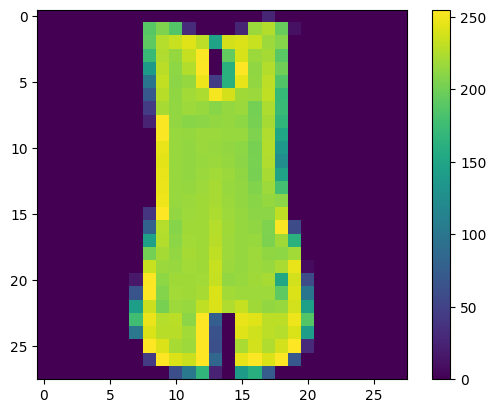

In [82]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [71]:
train_images = train_images / 255.0

test_images = test_images / 255.0

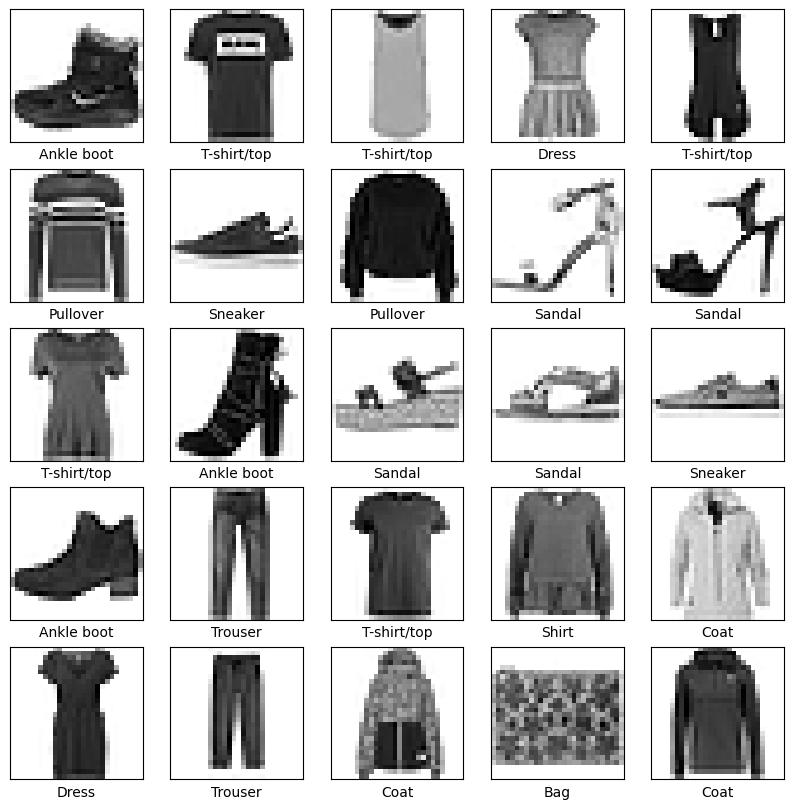

In [83]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Define the model
The following example uses a neural network that has 3 layers.

In [88]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  #keras.layers.Dense(10,activation='softmax')
  keras.layers.Dense(10)
  ])

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

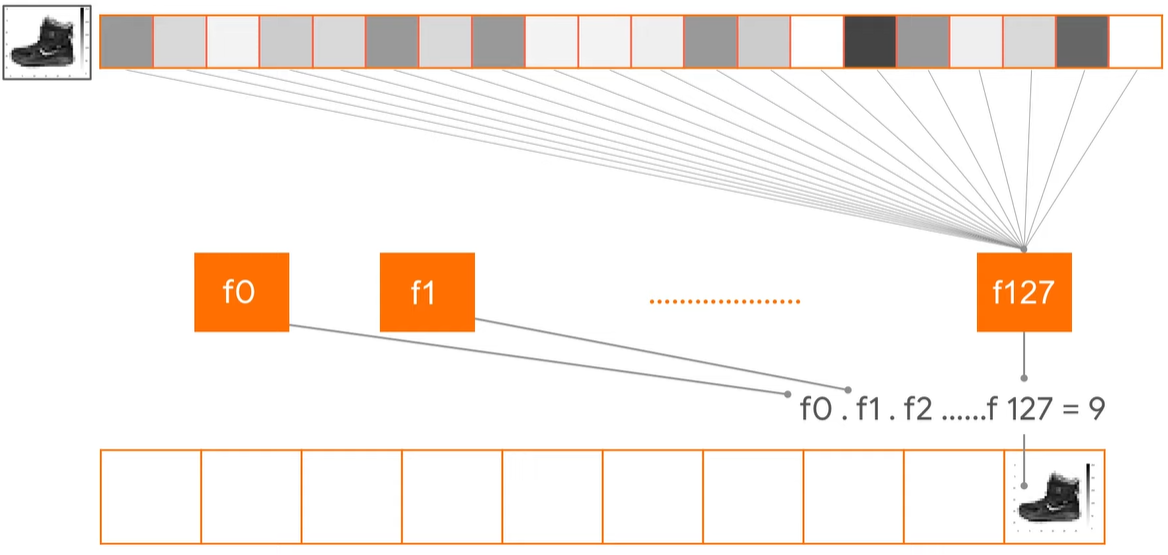

### Train the model

Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.

### Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [89]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 3.5278 - accuracy: 0.6866
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6846 - accuracy: 0.7441
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5997 - accuracy: 0.7811
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5408 - accuracy: 0.8135
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5325 - accuracy: 0.8142
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5509 - accuracy: 0.7991
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5020 - accuracy: 0.8267
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4817 - accuracy: 0.8353
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4736 - accuracy: 0.8379
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.464

### Evaluation of the trained model

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. 
An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

In [90]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5183 - accuracy: 0.8400 - 628ms/epoch - 2ms/step

Test accuracy: 0.8399999737739563


### Make predictions
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.


In [91]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [92]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [93]:
predictions[0]

array([1.1069528e-31, 3.2508818e-18, 0.0000000e+00, 3.1522348e-17,
       0.0000000e+00, 2.0132011e-03, 3.6086604e-29, 2.2708552e-02,
       2.0823993e-21, 9.7527814e-01], dtype=float32)

In [94]:
np.argmax(predictions[0])

9

### Graph this to look at the full set of 10 class predictions.


In [95]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

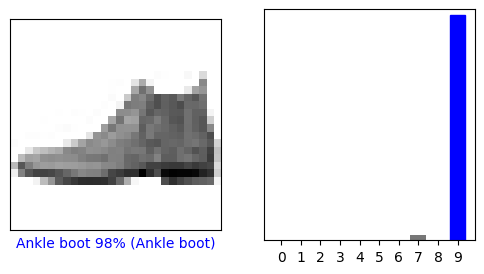

In [96]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

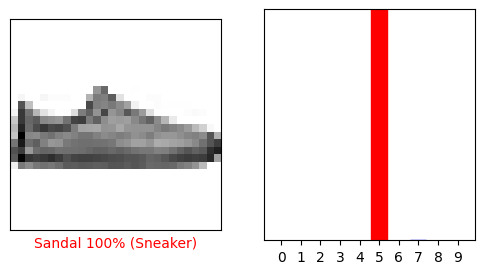

In [97]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

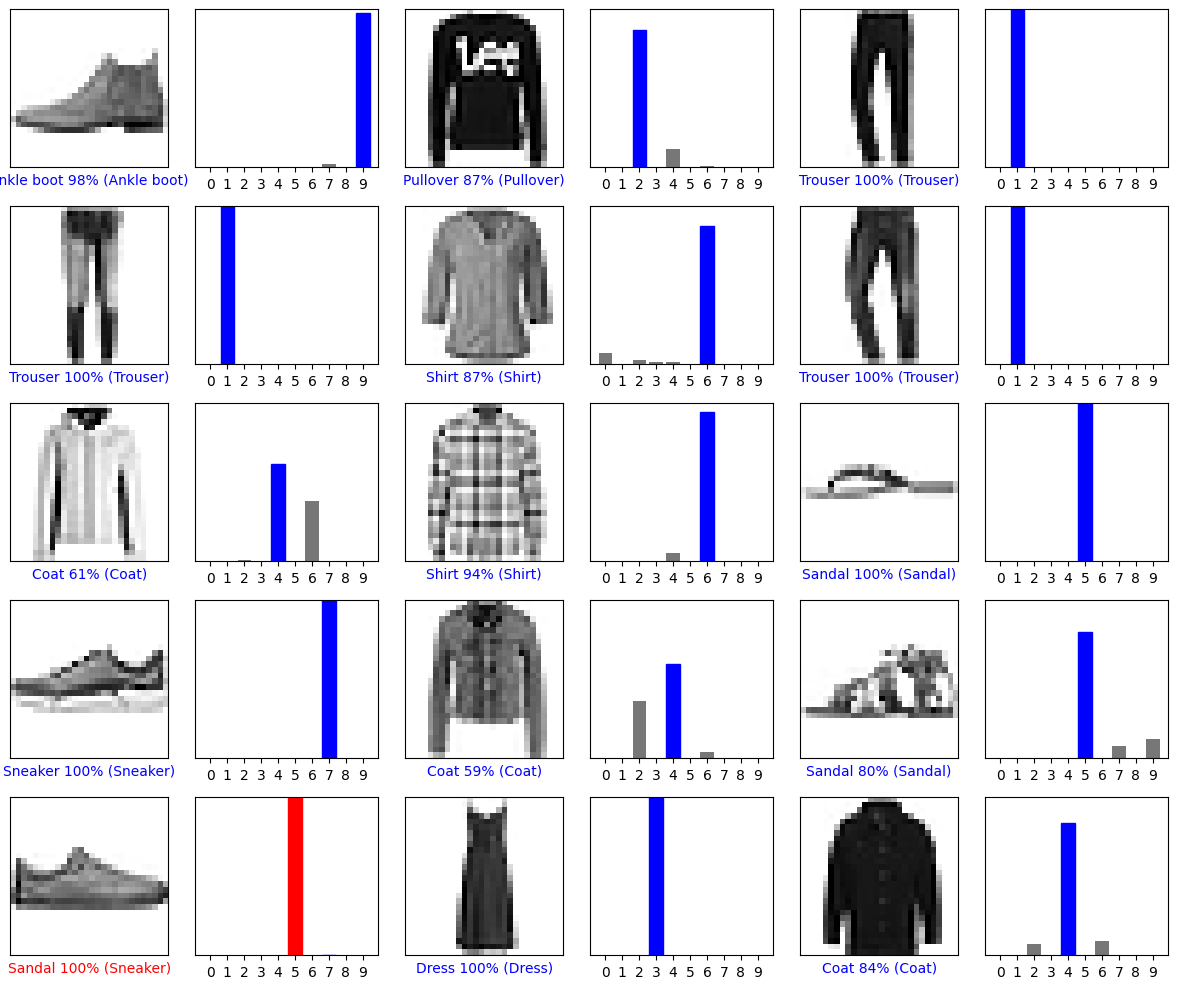

In [98]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [99]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [100]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [101]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[4.8048790e-03 2.7620322e-03 8.6757630e-01 3.8896754e-04 1.1619063e-01
  3.2447475e-20 8.2747051e-03 0.0000000e+00 2.5625736e-06 3.0012096e-35]]


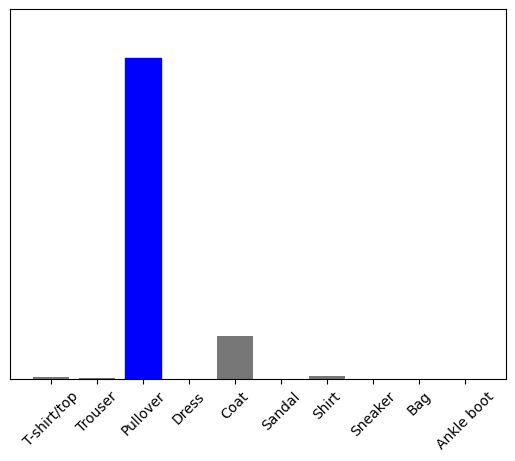

In [102]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [103]:
np.argmax(predictions_single[0])

2